In [1]:
import os
import io
import gym
import time
import torch
import pickle
import inspect
import numpy as np
import pandas as pd

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
xmin=0 
xmax=1
N = 100

## Reward Function One

In [3]:
# x is in [0,1] and y is the normalized height(3000), height in [0, 3000]
def reward_one(x, y):
    reward_fov = 100*np.tanh((2*np.pi*x-1.5*np.pi))
    reward_height = 300*np.tanh(y)
    
    return reward_fov - reward_height

<IPython.core.display.Javascript object>


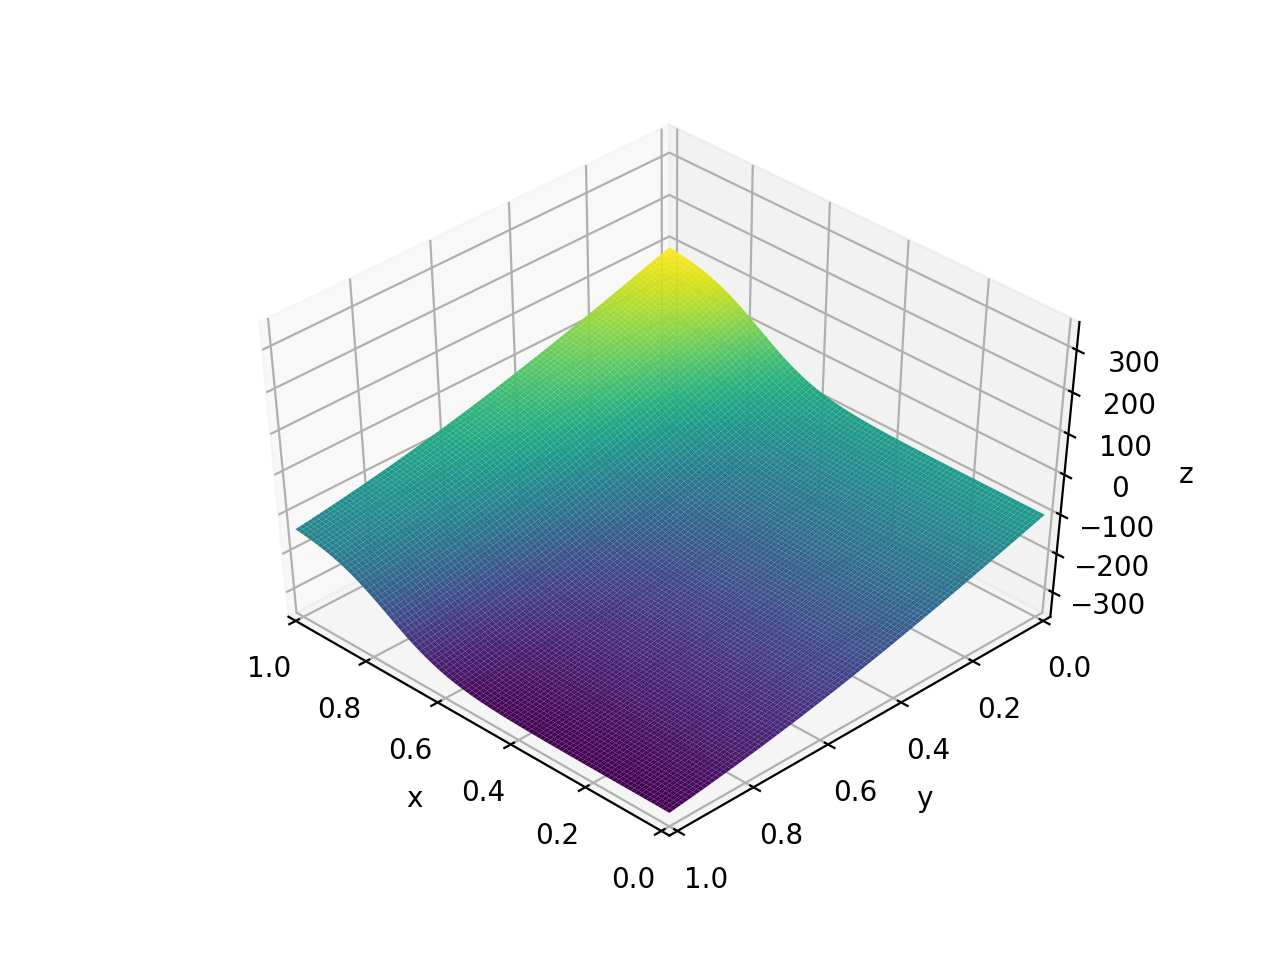

In [4]:
x1 = np.linspace(xmin, xmax, N, dtype=np.float32)
y1 = x1
x1, y1 = np.meshgrid(x1, y1)

z1 = reward_one(x1,y1)

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

# ax.contour3D(x, y, z, 50, cmap='binary')
# ax.plot_wireframe(x, y, z, color='blue')
ax1.plot_surface(x1, y1, z1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.set_xlim3d(0, 1)
ax1.set_ylim3d(0, 1)
ax1.set_zlim3d(-350, 350)


ax1.view_init(45, 135)

## Reward Function Two

In [5]:
# x is in [0,1] and y is the normalized height(3000), height in [0, 3000]
def reward_two(x2, y2):
    reward_fov_term1 = np.tanh((1/9)*(2.0*np.pi*x2-np.pi))
    reward_fov_term2 = np.tanh(0.5*(2.0*np.pi*x2-1.5*np.pi))
    reward_fov = 100*(reward_fov_term1+reward_fov_term2)
    reward_height = 100*np.tanh(y2)
    
    return reward_fov - reward_height

<IPython.core.display.Javascript object>


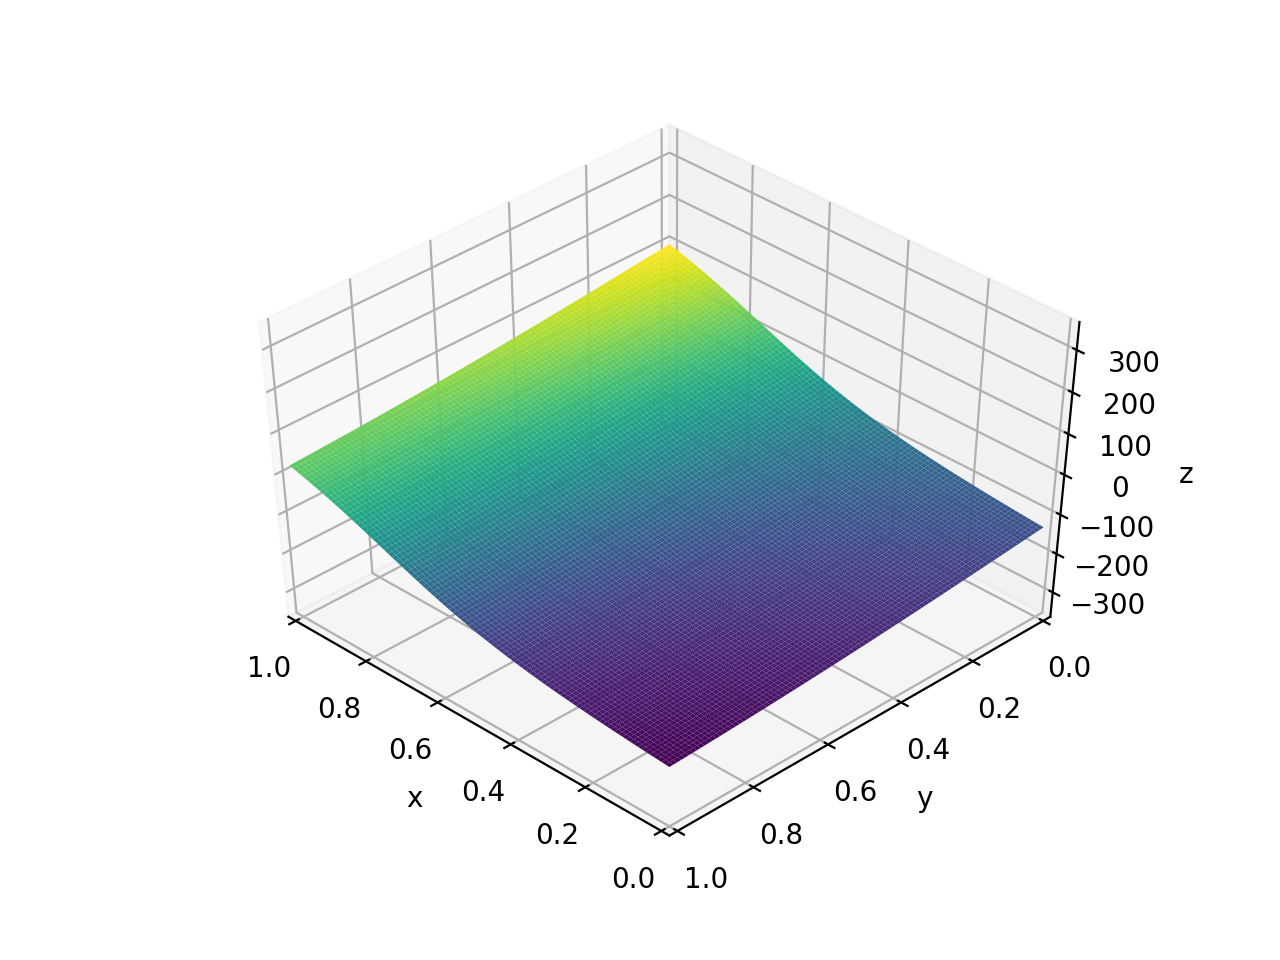

In [6]:
x2 = np.linspace(xmin, xmax, N, dtype=np.float32)
y2 = x2

x2, y2 = np.meshgrid(x2, y2)

z2 = reward_two(x2,y2)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

# ax.contour3D(x, y, z, 50, cmap='binary')
# ax.plot_wireframe(x, y, z, color='blue')
ax2.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

ax2.set_xlim3d(0, 1)
ax2.set_ylim3d(0, 1)
ax2.set_zlim3d(-350, 350)

ax2.view_init(45, 135)

## Reward Function Three

In [7]:
# x is in [0,1] and y is the normalized height(3000), height in [0, 3000]
def reward_three(x3,y3):
    term1 = np.tanh((1/9)*(2.0*np.pi*x3-np.pi))
    term2 = np.tanh(0.5*(2.0*np.pi*x3-1.5*np.pi))
    
    reward_fov = 100*(term1+term2)
    reward_height = 300*np.tanh(y3)
    
    return reward_fov - reward_height

<IPython.core.display.Javascript object>


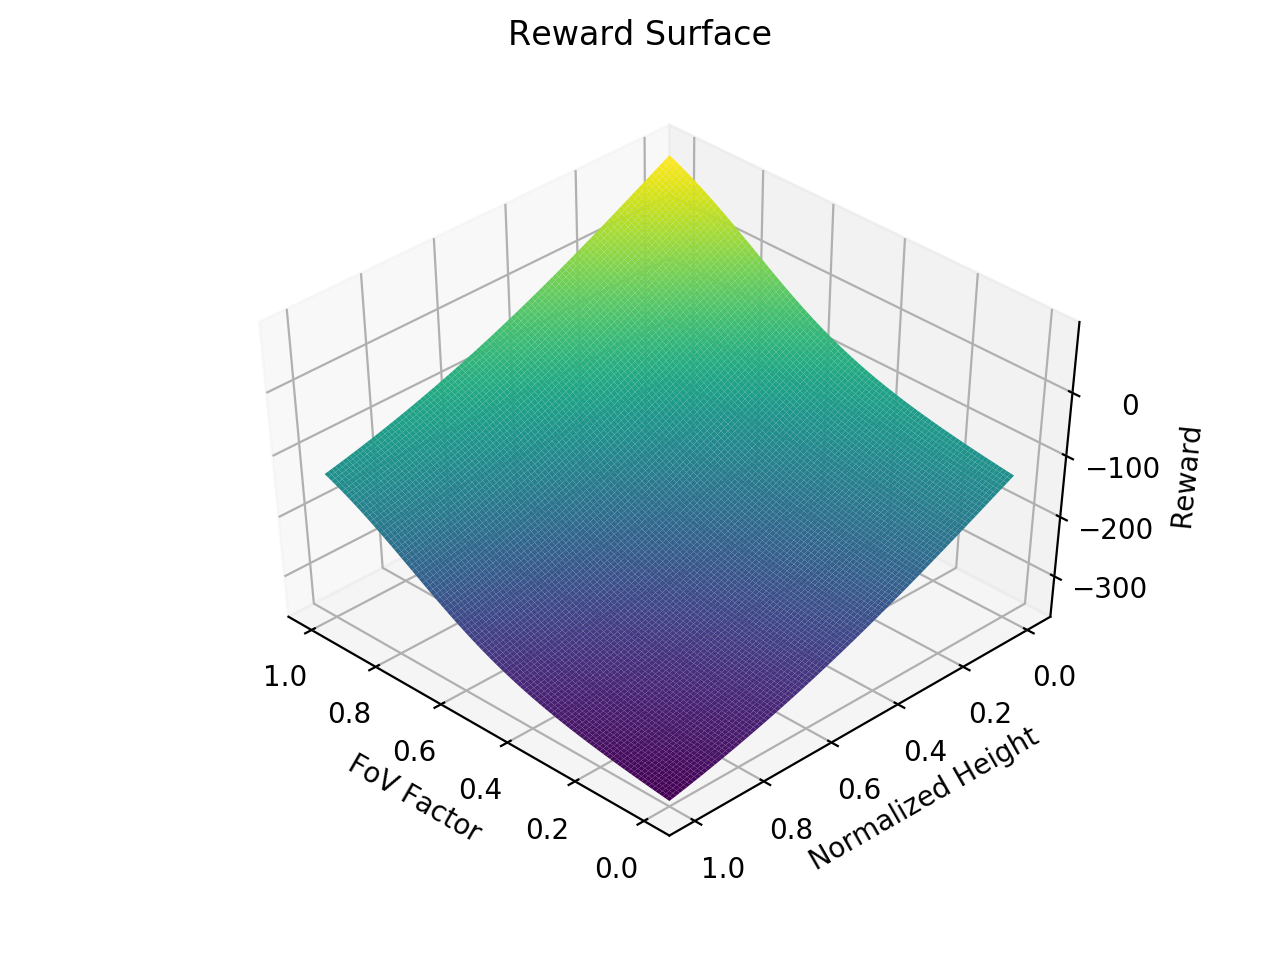

In [11]:
x3 = np.linspace(xmin, xmax, N, dtype=np.float32)
y3 = x3

x3, y3 = np.meshgrid(x3, y3)

z3 = reward_three(x3,y3)

fig3 = plt.figure()
fig3.suptitle('Reward Surface')
ax3 = plt.axes(projection='3d')

# ax.contour3D(x, y, z, 50, cmap='binary')
# ax.plot_wireframe(x, y, z, color='blue')
ax3.plot_surface(x3, y3, z3, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax3.set_xlabel('FoV Factor')
ax3.set_ylabel('Normalized Height')
ax3.set_zlabel('Reward')
ax3.view_init(45, 135)

fig3.savefig('RewardConfigOne.png', dpi=fig3.dpi)


## Reward Function Options

### Sinc Based

In [10]:
# x is in [0,1] and y is the normalized height(3000), height in [0, 3000]
def reward_sinc(x, y):
    paraboloid = 20.0*((x-1)**2 + y**2)
    term  = 5.0*np.sinc(2*((x-1)**2 + y**2) / np.pi)
    term1 = 5.0*np.sinc(4*((x-1)**2 + y**2) / np.pi)
    term2 = 5.0*np.sinc(6*((x-1)**2 + y**2) / np.pi)
    term3 = 5.0*np.sinc(8*((x-1)**2 + y**2) / np.pi)
    term4 = 5.0*np.sinc(10*((x-1)**2 + y**2) / np.pi)
    term5 = 5.0*np.sinc(12*((x-1)**2 + y**2) / np.pi)
    term6 = 5.0*np.sinc(14*((x-1)**2 + y**2) / np.pi)
    term7 = 5.0*np.sinc(16*((x-1)**2 + y**2) / np.pi)
    term8 = 5.0*np.sinc(18*((x-1)**2 + y**2) / np.pi)
    term9 = 5.0*np.sinc(20*((x-1)**2 + y**2) / np.pi)
    term10 = 5.0*np.sinc(22*((x-1)**2 + y**2) / np.pi)
    term11 = 5.0*np.sinc(24*((x-1)**2 + y**2) / np.pi)
    term12 = 5.0*np.sinc(26*((x-1)**2 + y**2) / np.pi)
    term13 = 5.0*np.sinc(28*((x-1)**2 + y**2) / np.pi)
    term = (-1)*paraboloid + term + term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 + term9 + term10 + term11 + term12 + term13
    reward = term
    return reward

<IPython.core.display.Javascript object>


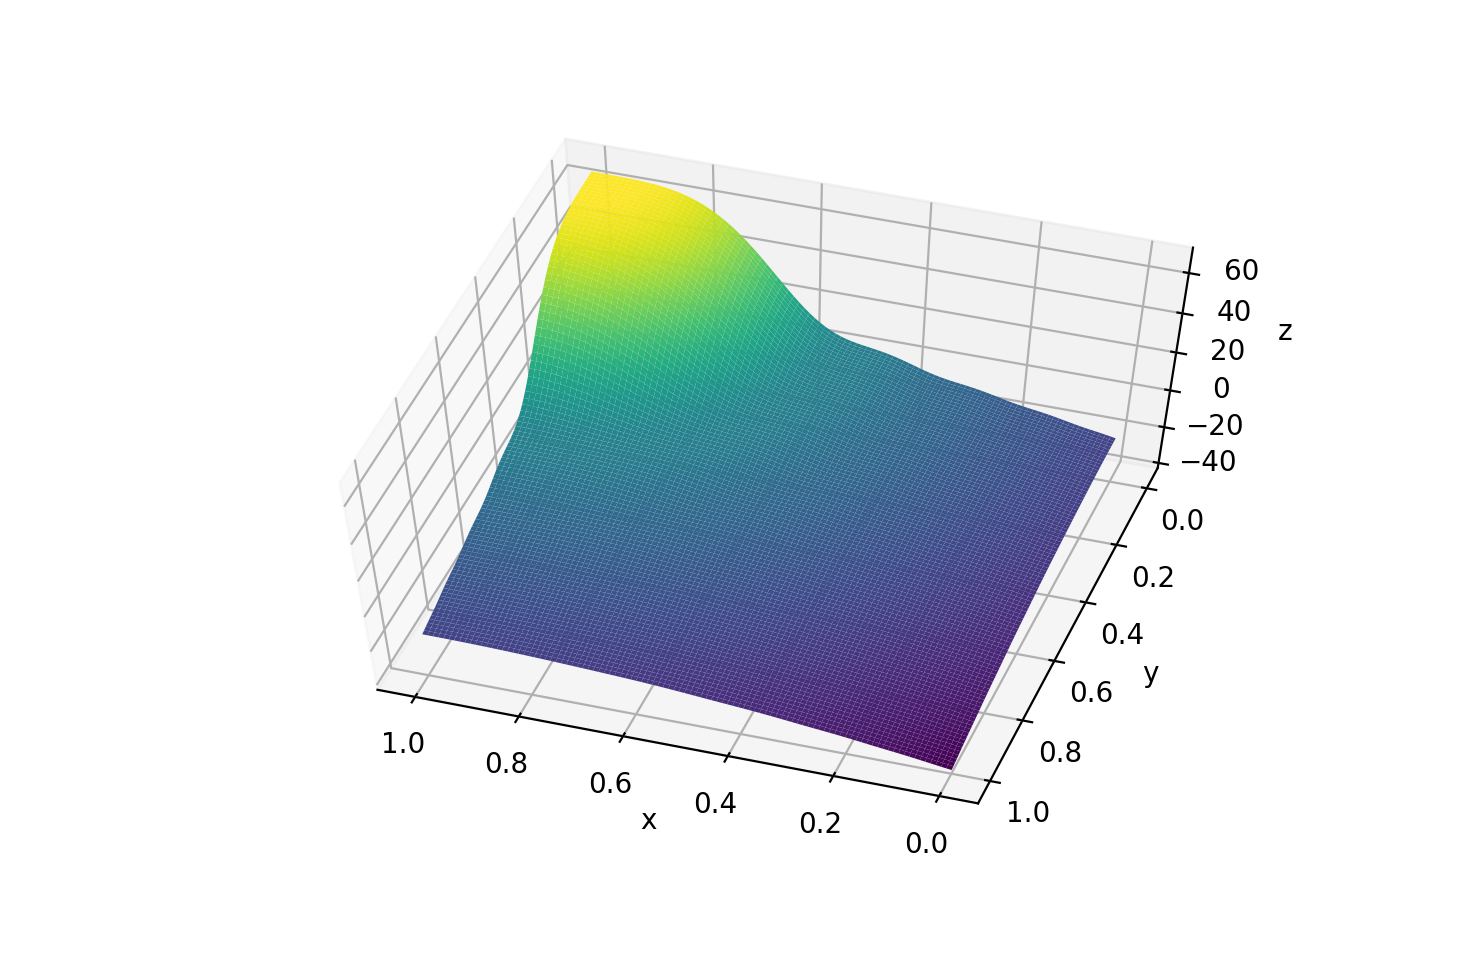

In [11]:
x4 = np.linspace(xmin, xmax, N, dtype=np.float32)
y4 = x4

x4, y4 = np.meshgrid(x4, y4)

z4 = reward_sinc(x4,y4)

fig4 = plt.figure()
ax4 = plt.axes(projection='3d')

# ax.contour3D(x, y, z, 50, cmap='binary')
# ax.plot_wireframe(x, y, z, color='blue')
ax4.plot_surface(x4, y4, z4, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')

ax4.view_init(45, 135)

### Reward Plane